In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [12]:
df=pd.read_csv("C:\\Users\\FLEMY\\Downloads\\churn\\train.csv")

In [242]:
df.shape[0]

36992

In [247]:
df['referral_id'].value_counts()

xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID62015        9
            ...  
CID40133        1
CID58656        1
CID7299         1
CID49031        1
CID20352        1
Name: referral_id, Length: 11359, dtype: int64

In [14]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

# Data Preprocessing

In [15]:
#dropping unecessary attributes as they do not help in determining the churn score
df2=df.drop(['Name','customer_id','referral_id','security_no'],axis=1)

In [16]:
df2.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


Imputaion of region_category (Qualitative data)

<AxesSubplot:>

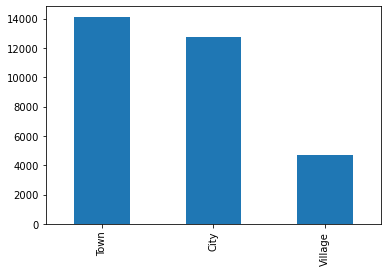

In [17]:
df['region_category'].value_counts().plot(kind='bar')

In [18]:
df['region_category'].isna().sum()

5428

In [19]:
for i,data in df2.iterrows():
    if pd.isnull(data["region_category"]):
        n=random.randint(0,2)
        if n==0:
            df2.at[i,"region_category"]='Town'
        elif n==1:
            df2.at[i,"region_category"]='City'
        else:
            df2.at[i,"region_category"]='Village'

In [20]:
df2['region_category'].isna().sum()

0

<AxesSubplot:>

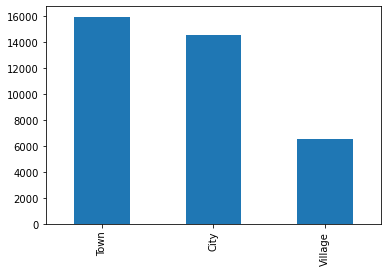

In [21]:
df2['region_category'].value_counts().plot(kind='bar')

Imputation of preferred_offer_types (Qualitative data)

<AxesSubplot:>

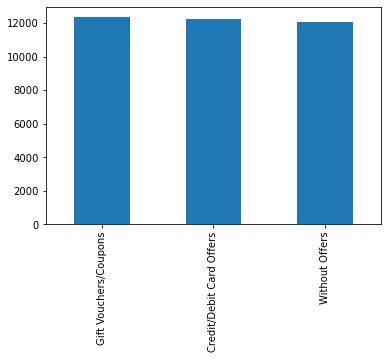

In [22]:
df['preferred_offer_types'].value_counts().plot(kind='bar')

In [23]:
df['preferred_offer_types'].isna().sum()

288

In [24]:
for i,data in df2.iterrows():
    if pd.isnull(data["preferred_offer_types"]):
        n=random.randint(0,2)
        if n==0:
            df2.at[i,"preferred_offer_types"]='Gift Vouchers/Coupons'
        elif n==1:
            df2.at[i,"preferred_offer_types"]='Credit/Debit Card Offers'
        else:
            df2.at[i,"preferred_offer_types"]='Without Offers'

In [25]:
df2['preferred_offer_types'].isna().sum()

0

<AxesSubplot:>

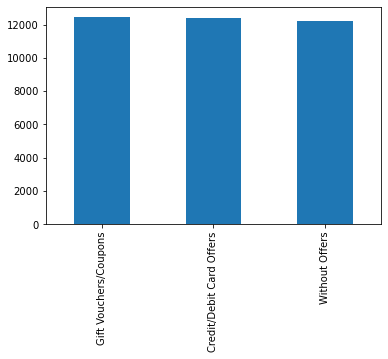

In [26]:
df2['preferred_offer_types'].value_counts().plot(kind='bar')

Imputaion of points_in_wallet (Quantitative data)    

In [27]:
df['points_in_wallet'].isna().sum()

3443

In [28]:
mean_points=df2['points_in_wallet'].mean()
std_points=df2['points_in_wallet'].std()

In [29]:
for i,data in df2.iterrows():
    if pd.isnull(data['points_in_wallet']):
         r=np.random.uniform(mean_points-std_points,mean_points+std_points)
         df2.at[i,'points_in_wallet']=r

In [30]:
df2['points_in_wallet'].isna().sum()

0

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points_in_wallet'>

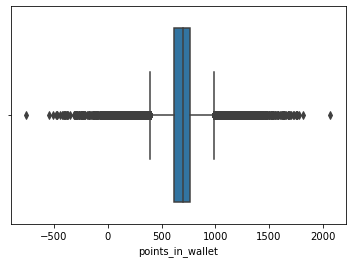

In [31]:
#Detecting Outliers
sns.boxplot(df['points_in_wallet'])

In [32]:
#detecting outliers
q1=df2.points_in_wallet.quantile(0.25)
q3=df2.points_in_wallet.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df[(df['points_in_wallet']<lowerfence) | (df['points_in_wallet']>upperfence)]
df3.shape[0]

4267

In [33]:
#Removing outliers
for i,data in df2.iterrows():
    if data['points_in_wallet']<q1:
        df2.at[i,'points_in_wallet']=lowerfence 
    elif data['points_in_wallet']>q3:
        df2.at[i,'points_in_wallet']=upperfence 

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points_in_wallet'>

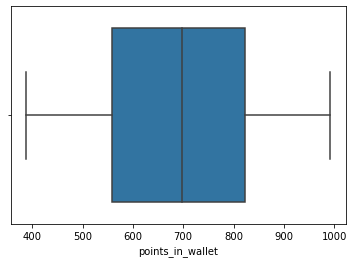

In [34]:
sns.boxplot(df2['points_in_wallet'])

Imputation of garbage values in joined_through_referral (Qualitative data)

<AxesSubplot:>

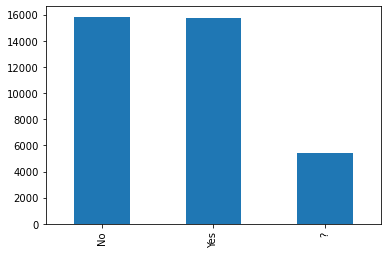

In [35]:
df['joined_through_referral'].value_counts().plot(kind='bar')

In [36]:
df['joined_through_referral'].value_counts().loc['?']

5438

In [37]:
for i,data in df2.iterrows():
    if data["joined_through_referral"]=='?':
        n=random.randint(0,1)
        if n==0:
            df2.at[i,"joined_through_referral"]='Yes'
        else:
            df2.at[i,"joined_through_referral"]='No'

<AxesSubplot:>

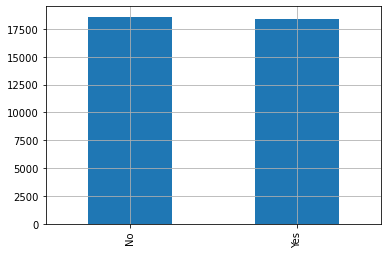

In [38]:
df2['joined_through_referral'].value_counts().plot(kind='bar',grid=True)

Imputation of medium_of_operation (Qualitative data)

<AxesSubplot:>

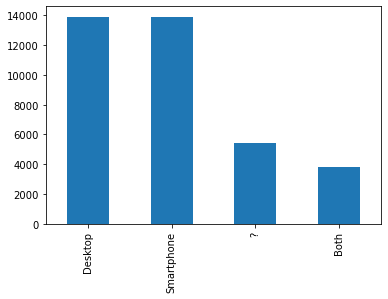

In [39]:
df['medium_of_operation'].value_counts().plot(kind='bar')

In [40]:
df['medium_of_operation'].value_counts().loc['?']

5393

In [41]:
for i,data in df2.iterrows():
    if data["medium_of_operation"]=='?':
        n=random.randint(0,2)
        if n==0:
            df2.at[i,"medium_of_operation"]='Desktop'
        elif n==1:
            df2.at[i,"medium_of_operation"]='Smartphone'
        else:
            df2.at[i,"medium_of_operation"]='Both'

<AxesSubplot:>

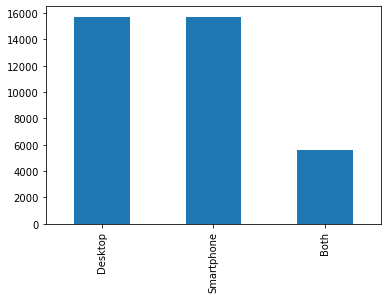

In [42]:
df2['medium_of_operation'].value_counts().plot(kind='bar')

In [43]:
df2.tail()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,46,F,Town,Basic Membership,2017-09-21,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,...,-650.682759,27277.68,6.0,639.51,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,23:18:31,...,-638.123421,11069.71,28.0,387.59,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,City,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,...,154.940000,38127.56,Error,680.47,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,...,482.610000,2378.86,20.0,387.59,Yes,Yes,No,Not Applicable,No reason specified,3
36991,35,M,Town,Silver Membership,2015-10-23,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,01:39:52,...,79.180000,2189.68,Error,719.97,Yes,No,No,Not Applicable,Quality Customer Care,2


Imputation of avg_time_spent as time cannot be measured in negative values (Quantitaive data)

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_spent'>

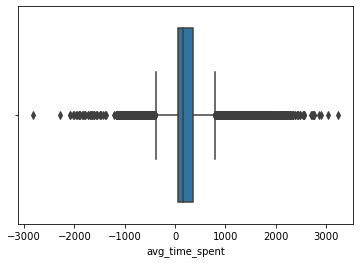

In [44]:
sns.boxplot(df['avg_time_spent'])

In [45]:
df['avg_time_spent'].describe()

count    36992.000000
mean       243.472334
std        398.289149
min      -2814.109110
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64

In [46]:
df[df['avg_time_spent'] <0].count()['avg_time_spent']

1719

In [47]:
#Detecting Outliers

q1=df2.avg_time_spent.quantile(0.25)
q3=df2.avg_time_spent.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df[(df['avg_time_spent']<lowerfence) | (df['avg_time_spent']>upperfence)]
df3.shape[0]

4677

In [48]:
#Removing outliers
for i,data in df2.iterrows():
    if data['avg_time_spent']<q1:
        df2.at[i,'avg_time_spent']=lowerfence 
    elif data['avg_time_spent']>q3:
        df2.at[i,'avg_time_spent']=upperfence 

In [49]:
df2['avg_time_spent'].describe()

count    36992.000000
mean       192.358574
std        423.519419
min       -384.516250
25%        -51.046563
50%        161.765000
75%        467.665937
max        801.133750
Name: avg_time_spent, dtype: float64

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_spent'>

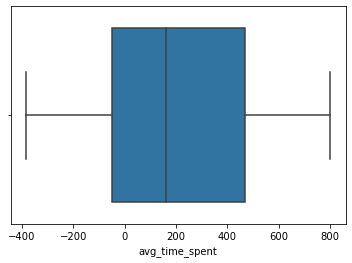

In [50]:
sns.boxplot(df2['avg_time_spent'])

In [51]:
#Converting negative values into positive values
df2['avg_time_spent']=df2['avg_time_spent'].abs()

In [52]:
df2[df2['avg_time_spent'] <0].count()['avg_time_spent']

0

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_spent'>

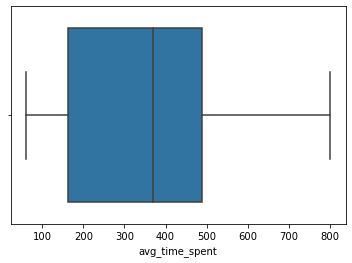

In [53]:
sns.boxplot(df2['avg_time_spent'])

In [54]:
#df2['days_since_last_login']=df['days_since_last_login']

Imputaton of days_since_last_login (Qualitative data)

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_last_login'>

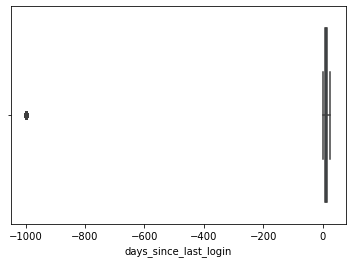

In [55]:
sns.boxplot(df2['days_since_last_login'])

In [56]:
df2['days_since_last_login'].describe()

count    36992.000000
mean       -41.915576
std        228.819900
min       -999.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         26.000000
Name: days_since_last_login, dtype: float64

In [57]:
df2[df2['days_since_last_login'] <0].count()['days_since_last_login']

1999

In [58]:
#Detecting Outliers
q1=df2.days_since_last_login.quantile(0.25)
q3=df2.days_since_last_login.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df2[(df2['days_since_last_login']<lowerfence) | (df2['days_since_last_login']>upperfence)]
df3.shape[0]

1999

In [59]:
#Removing outliers
for i,data in df2.iterrows():
    if data['days_since_last_login']<q1:
        df2.at[i,'days_since_last_login']=lowerfence 
    elif data['days_since_last_login']>q3:
        df2.at[i,'days_since_last_login']=upperfence 

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_last_login'>

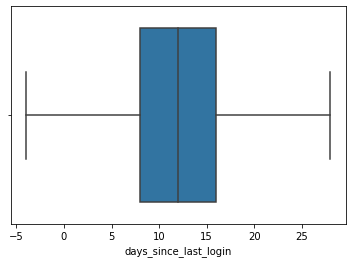

In [60]:
sns.boxplot(df2['days_since_last_login'])

In [61]:
df2[df2['days_since_last_login'] <0].count()['days_since_last_login']

8723

In [62]:
#Converting negative values into positive values
df2['days_since_last_login']=df2['days_since_last_login'].abs()

In [63]:
df2=df2.drop('last_visit_time',axis=1)# Dropping last_time_visit as there is an an attribute with average frequency login and days after last login

<AxesSubplot:>

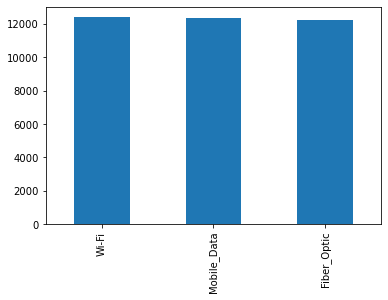

In [64]:
#Qualitative data
df2['internet_option'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

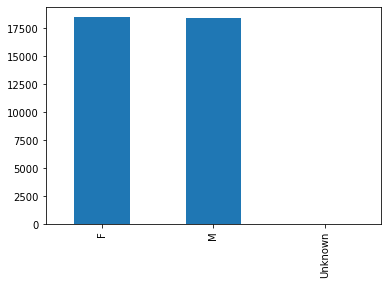

In [65]:
#Qualitative data
df2['gender'].value_counts().plot(kind='bar')#Imputation not required

In [66]:
df2=df2.drop(['joining_date'],axis=1)#Removing as not rquired

<AxesSubplot:>

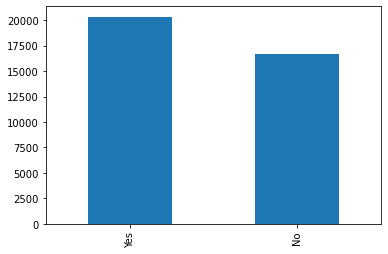

In [67]:
#Qualitative data
df2['used_special_discount'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

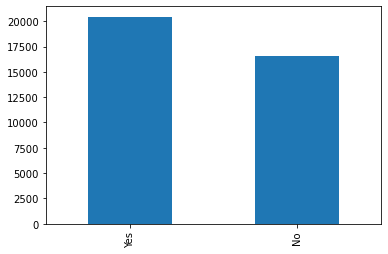

In [68]:
#Qualitative data
df2['offer_application_preference'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

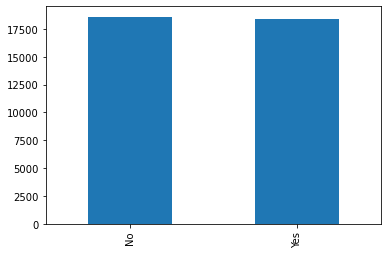

In [69]:
#Qualitative data
df2['past_complaint'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

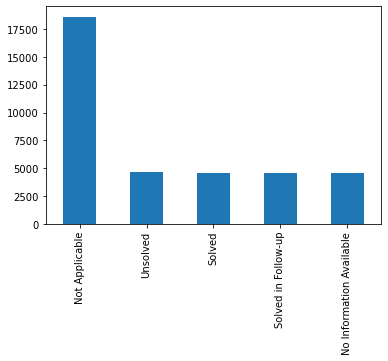

In [70]:
#Qualitative data
df2['complaint_status'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

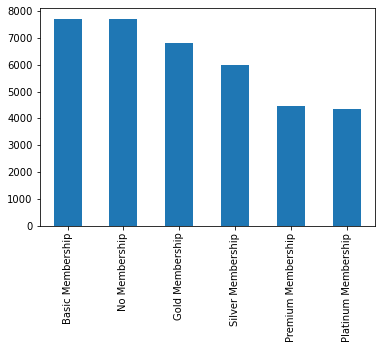

In [71]:
#Qualitative data
df2['membership_category'].value_counts().plot(kind='bar')#Imputation not required

<AxesSubplot:>

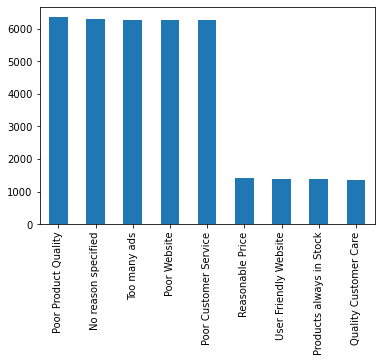

In [72]:
#Qualitative data
df2['feedback'].value_counts().plot(kind='bar')#Imputation not required

Age imputation

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

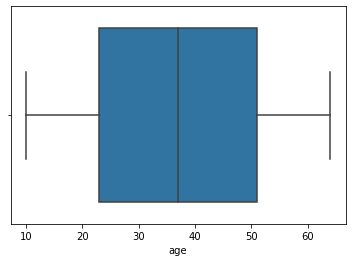

In [73]:
sns.boxplot(df2['age'])

In [74]:
#Detecting Outliers
q1=df2.age.quantile(0.25)
q3=df2.age.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df2[(df2['age']<lowerfence) | (df2['age']>upperfence)]
df3.shape[0]
#No outliers detected

0

Imputation of avg_transaction_value (Qualtitaive data)

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_transaction_value'>

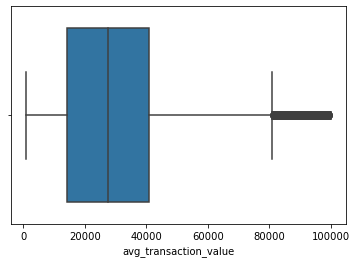

In [75]:
sns.boxplot(df2['avg_transaction_value'])

In [76]:
#Detecting Outliers
q1=df2.avg_transaction_value.quantile(0.25)
q3=df2.avg_transaction_value.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df2[(df2['avg_transaction_value']<lowerfence) | (df2['avg_transaction_value']>upperfence)]
df3.shape[0]

1131

In [77]:
#Removing outliers
for i,data in df2.iterrows():
    if data['avg_transaction_value']<q1:
        df2.at[i,'avg_transaction_value']=lowerfence 
    elif data['avg_transaction_value']>q3:
        df2.at[i,'avg_transaction_value']=upperfence 

In [78]:
#As average transaction value cannot be negative
df2['avg_transaction_value']=df2['avg_transaction_value'].abs()

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_transaction_value'>

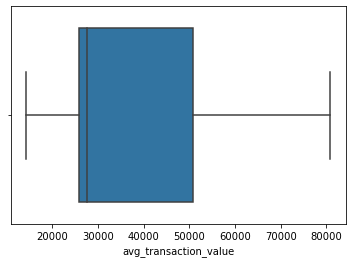

In [79]:
sns.boxplot(df2['avg_transaction_value'])

Imputation of avg_frequency_login_days

In [80]:
df2.tail()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,4,384.51625,27277.680,6.0,639.51,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,384.51625,25838.815,28.0,387.59,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,City,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.94000,38127.560,Error,680.47,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,801.13375,25838.815,20.0,387.59,Yes,Yes,No,Not Applicable,No reason specified,3
36991,35,M,Town,Silver Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,15,79.18000,25838.815,Error,719.97,Yes,No,No,Not Applicable,Quality Customer Care,2


In [81]:
df2["avg_frequency_login_days"]=df["avg_frequency_login_days"]

In [82]:
df2["avg_frequency_login_days"]

0         17.0
1         10.0
2         22.0
3          6.0
4         16.0
         ...  
36987      6.0
36988     28.0
36989    Error
36990     20.0
36991    Error
Name: avg_frequency_login_days, Length: 36992, dtype: object

In [83]:
#replacing 'Error' by 0
for i,data in df2.iterrows():
    if data["avg_frequency_login_days"]=='Error':
        df2.at[i,"avg_frequency_login_days"]=0     
        #print(df2.at[i,"avg_frequency_login_days"])

In [84]:
df2["avg_frequency_login_days"]=df2["avg_frequency_login_days"].astype('O')

In [85]:
df2["avg_frequency_login_days"]=df2["avg_frequency_login_days"].astype('float')

In [86]:
avg_days=df2['avg_frequency_login_days'].mean()
std_days=df2['avg_frequency_login_days'].std()

In [87]:
for i,data in df2.iterrows():
    if data["avg_frequency_login_days"]==0:
        r=np.random.uniform(avg_days-std_days,avg_days+std_days) 
        r=np.round(r,0)
        df2.at[i,"avg_frequency_login_days"]=r         
        print(df2.at[i,"avg_frequency_login_days"])

18.0
5.0
13.0
18.0
9.0
22.0
5.0
6.0
7.0
9.0
15.0
22.0
16.0
6.0
5.0
9.0
19.0
21.0
7.0
13.0
21.0
16.0
14.0
19.0
10.0
7.0
13.0
8.0
17.0
6.0
10.0
14.0
12.0
6.0
23.0
22.0
18.0
18.0
12.0
7.0
5.0
20.0
22.0
21.0
6.0
20.0
7.0
15.0
15.0
11.0
14.0
21.0
11.0
22.0
21.0
15.0
17.0
9.0
16.0
23.0
18.0
16.0
16.0
13.0
20.0
19.0
9.0
24.0
22.0
11.0
16.0
20.0
21.0
21.0
13.0
11.0
13.0
12.0
7.0
19.0
9.0
13.0
24.0
12.0
15.0
14.0
17.0
7.0
21.0
10.0
11.0
10.0
7.0
23.0
20.0
16.0
13.0
9.0
24.0
16.0
11.0
7.0
22.0
10.0
10.0
20.0
19.0
14.0
21.0
18.0
20.0
16.0
15.0
19.0
9.0
9.0
13.0
8.0
13.0
9.0
22.0
12.0
17.0
18.0
16.0
19.0
22.0
15.0
22.0
13.0
14.0
19.0
16.0
16.0
16.0
16.0
13.0
21.0
7.0
21.0
6.0
10.0
7.0
17.0
5.0
7.0
12.0
6.0
11.0
20.0
10.0
5.0
18.0
12.0
20.0
24.0
5.0
18.0
15.0
6.0
20.0
23.0
7.0
18.0
5.0
24.0
24.0
19.0
19.0
8.0
13.0
13.0
8.0
11.0
8.0
17.0
22.0
13.0
10.0
11.0
16.0
17.0
18.0
15.0
16.0
11.0
13.0
24.0
14.0
20.0
24.0
15.0
7.0
14.0
17.0
6.0
20.0
23.0
20.0
9.0
13.0
6.0
17.0
16.0
14.0
12.0
22.0
9.0
15.0
9.0


7.0
19.0
15.0
15.0
10.0
14.0
8.0
10.0
15.0
5.0
22.0
12.0
19.0
21.0
9.0
8.0
10.0
7.0
6.0
7.0
16.0
20.0
9.0
20.0
10.0
19.0
9.0
19.0
22.0
18.0
6.0
14.0
22.0
20.0
17.0
8.0
7.0
19.0
13.0
14.0
15.0
7.0
20.0
20.0
23.0
16.0
16.0
8.0
21.0
19.0
15.0
14.0
7.0
18.0
5.0
15.0
10.0
9.0
20.0
7.0
16.0
11.0
14.0
24.0
10.0
20.0
10.0
19.0
18.0
8.0
15.0
7.0
7.0
6.0
19.0
11.0
19.0
14.0
6.0
6.0
11.0
12.0
16.0
15.0
22.0
9.0
15.0
15.0
7.0
13.0
12.0
13.0
13.0
7.0
7.0
16.0
21.0
21.0
18.0
19.0
22.0
10.0
8.0
13.0
7.0
16.0
5.0
13.0
10.0
19.0
20.0
12.0
11.0
6.0
16.0
8.0
5.0
18.0
16.0
16.0
21.0
17.0
10.0
23.0
22.0
11.0
18.0
19.0
23.0
8.0
19.0
19.0
22.0
11.0
11.0
10.0
24.0
13.0
15.0
13.0
13.0
11.0
15.0
16.0
13.0
17.0
15.0
5.0
23.0
24.0
20.0
13.0
8.0
14.0
10.0
22.0
6.0
19.0
9.0
21.0
8.0
14.0
15.0
24.0
8.0
18.0
12.0
17.0
18.0
15.0
16.0
17.0
7.0
6.0
15.0
18.0
22.0
10.0
9.0
13.0
14.0
10.0
6.0
10.0
19.0
22.0
19.0
19.0
19.0
5.0
15.0
16.0
17.0
14.0
5.0
6.0
8.0
5.0
10.0
16.0
9.0
7.0
7.0
10.0
5.0
14.0
5.0
20.0
11.0
22.0
9.0
12

7.0
22.0
23.0
9.0
10.0
11.0
22.0
18.0
19.0
24.0
23.0


In [88]:
df2["avg_frequency_login_days"]=df2["avg_frequency_login_days"].abs()
#df2["avg_frequency_login_days"]=np.round(df2["avg_frequency_login_days"],0)

In [89]:
df2["avg_frequency_login_days"].describe()

count    36992.000000
mean        16.234577
std          8.197087
min          0.006221
25%         10.000000
50%         16.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_frequency_login_days'>

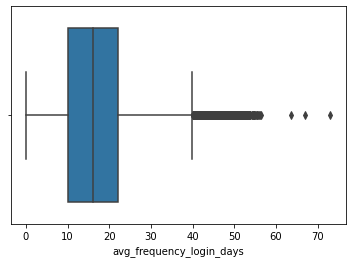

In [90]:
sns.boxplot(df2["avg_frequency_login_days"])

In [91]:
#Detecting Outliers
q1=df2.avg_frequency_login_days.quantile(0.25)
q3=df2.avg_frequency_login_days.quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df2[(df2['avg_frequency_login_days']<lowerfence) | (df2['avg_frequency_login_days']>upperfence)]
df3.shape[0]
#Not removing outliers as it is very less as compared to the size of th data and removing is causing errors

419

Churn Risk Score

<AxesSubplot:>

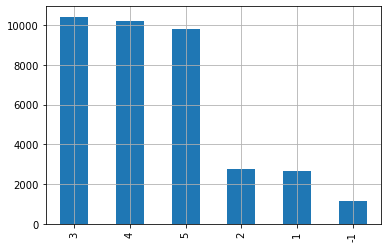

In [92]:
df2['churn_risk_score'].value_counts().plot(kind='bar',grid=True)

In [93]:
df2['churn_risk_score']=df2['churn_risk_score'].abs()#Assigning 1 to -1 values

<AxesSubplot:>

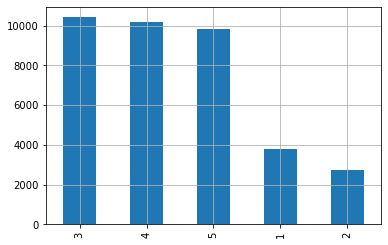

In [94]:
df2['churn_risk_score'].value_counts().plot(kind='bar',grid=True)

In [95]:
df2.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,14.141220,384.616699,40435.722731,16.234577,691.043631,3.526276
std,15.867412,8.746482,261.605648,23977.628968,8.197087,215.878501,1.244039
min,10.000000,4.000000,60.110000,14177.730000,0.006221,387.590000,1.000000
25%,23.000000,8.000000,161.767500,25838.815000,10.000000,557.607500,3.000000
50%,37.000000,12.000000,370.513125,27554.485000,16.000000,696.934804,4.000000
75%,51.000000,16.000000,488.670625,50858.433750,22.000000,822.072500,5.000000
max,64.000000,28.000000,801.133750,80871.465000,73.061995,992.090000,5.000000


In [248]:
df2['Cat_age']=pd.cut(df2['age'],4)
df2['Cat_days_since_last_login']=pd.cut(df2['days_since_last_login'],4)
df2['Cat_avg_time_spent']=pd.cut(df2['avg_time_spent'],4)
df2['Cat_avg_transaction_value']=pd.cut(df2['avg_transaction_value'],4)
df2['Cat_avg_frequency_login_days']=pd.cut(df2['avg_frequency_login_days'],4)
df2['Cat_points_in_wallet']=pd.cut(df2['points_in_wallet'],4)

In [249]:
df2.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,past_complaint,complaint_status,feedback,churn_risk_score,Cat_age,Cat_days_since_last_login,Cat_avg_time_spent,Cat_avg_transaction_value,Cat_avg_frequency_login_days,Cat_points_in_wallet
0,8,0,2,3,0,1,2,2,10,11638,...,0,1,4,1,"(-0.054, 13.5]","(7.5, 10.0]","(9969.0, 13292.0]","(13835.25, 18447.0]","(413.0, 826.0]","(8678.25, 11571.0]"
1,22,0,0,4,0,1,1,1,9,11819,...,1,2,5,0,"(13.5, 27.0]","(7.5, 10.0]","(9969.0, 13292.0]","(4611.75, 9223.5]","(413.0, 826.0]","(-11.571, 2892.75]"
2,34,0,1,2,1,1,1,2,7,13292,...,1,3,3,4,"(27.0, 40.5]","(5.0, 7.5]","(9969.0, 13292.0]","(4611.75, 9223.5]","(413.0, 826.0]","(-11.571, 2892.75]"
3,27,1,0,2,1,1,1,1,4,13291,...,1,4,3,4,"(13.5, 27.0]","(2.5, 5.0]","(9969.0, 13292.0]","(4611.75, 9223.5]","(-1.652, 413.0]","(-11.571, 2892.75]"
4,21,0,0,2,0,0,2,1,10,3380,...,1,2,3,4,"(13.5, 27.0]","(7.5, 10.0]","(3323.0, 6646.0]","(4611.75, 9223.5]","(413.0, 826.0]","(2892.75, 5785.5]"


<AxesSubplot:xlabel='gender'>

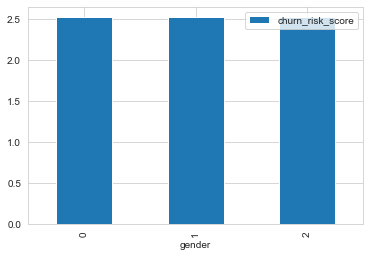

In [250]:
df2[['churn_risk_score','gender']].groupby('gender').mean().sort_values(by='gender').plot(kind='bar')

<AxesSubplot:xlabel='Cat_age'>

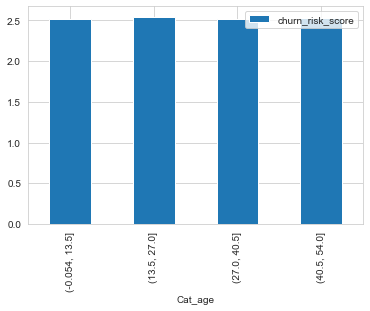

In [252]:
df2[['Cat_age','churn_risk_score']].groupby(['Cat_age']).mean().plot(kind='bar')

<AxesSubplot:xlabel='membership_category'>

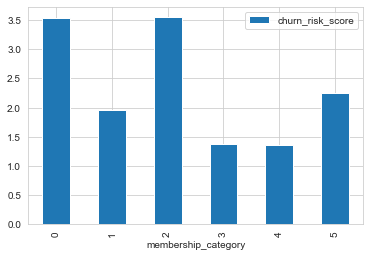

In [253]:
df2[['membership_category','churn_risk_score']].groupby(['membership_category']).mean().plot(kind='bar')

<AxesSubplot:xlabel='joined_through_referral'>

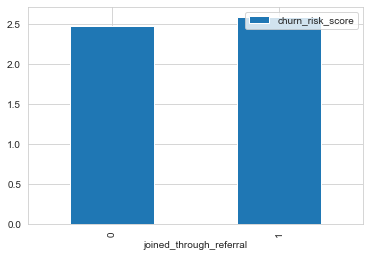

In [254]:
df2[['joined_through_referral','churn_risk_score']].groupby(['joined_through_referral']).mean().plot(kind='bar')

<AxesSubplot:xlabel='preferred_offer_types'>

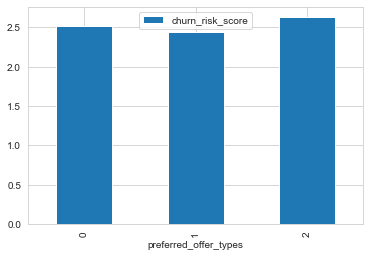

In [255]:
df2[['preferred_offer_types','churn_risk_score']].groupby(['preferred_offer_types']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='internet_option'>

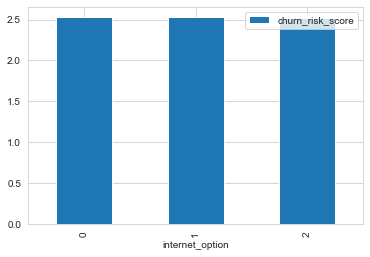

In [256]:
df2[['internet_option','churn_risk_score']].groupby(['internet_option']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='Cat_days_since_last_login'>

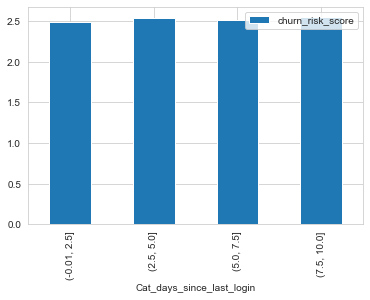

In [257]:
df2[['Cat_days_since_last_login','churn_risk_score']].groupby(['Cat_days_since_last_login']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='Cat_avg_time_spent'>

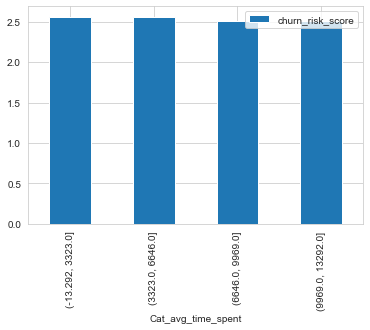

In [258]:
df2[['Cat_avg_time_spent','churn_risk_score']].groupby(['Cat_avg_time_spent']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='Cat_avg_transaction_value'>

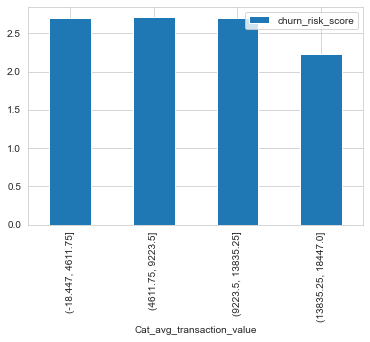

In [259]:
df2[['Cat_avg_transaction_value','churn_risk_score']].groupby(['Cat_avg_transaction_value']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='Cat_avg_frequency_login_days'>

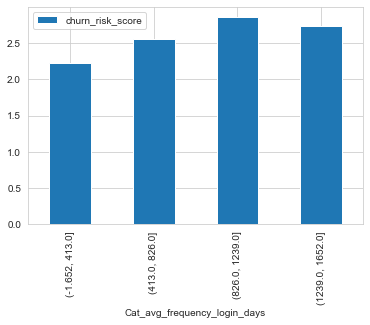

In [260]:
df2[['Cat_avg_frequency_login_days','churn_risk_score']].groupby(['Cat_avg_frequency_login_days']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='Cat_points_in_wallet'>

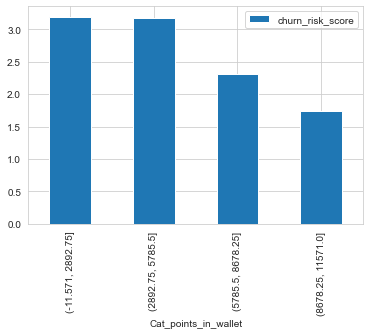

In [261]:
df2[['Cat_points_in_wallet','churn_risk_score']].groupby(['Cat_points_in_wallet']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='used_special_discount'>

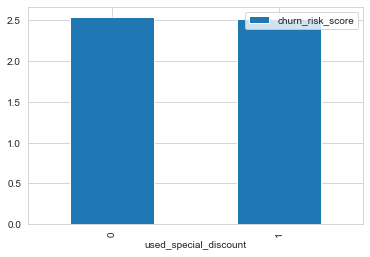

In [262]:
df2[['used_special_discount','churn_risk_score']].groupby(['used_special_discount']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='offer_application_preference'>

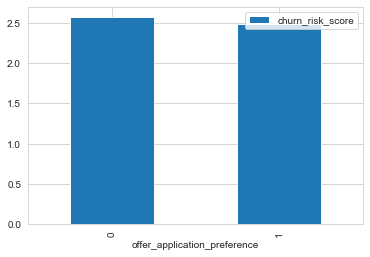

In [263]:
df2[['offer_application_preference','churn_risk_score']].groupby(['offer_application_preference']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='past_complaint'>

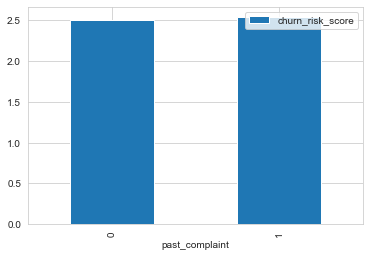

In [264]:
df2[['past_complaint','churn_risk_score']].groupby(['past_complaint']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='complaint_status'>

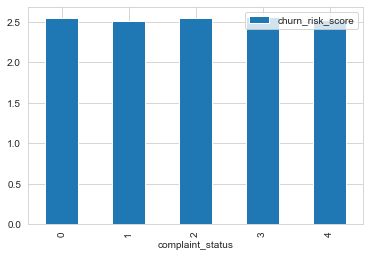

In [265]:
df2[['complaint_status','churn_risk_score']].groupby(['complaint_status']).mean().plot(kind='bar',grid=True)

<AxesSubplot:xlabel='feedback'>

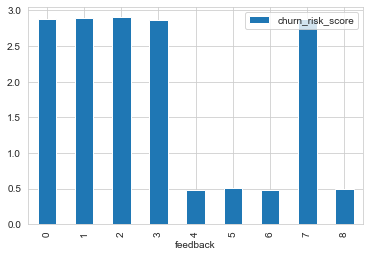

In [266]:
df2[['feedback','churn_risk_score']].groupby(['feedback']).mean().plot(kind='bar',grid=True)

In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           36992 non-null  int8    
 1   gender                        36992 non-null  int8    
 2   region_category               36992 non-null  int8    
 3   membership_category           36992 non-null  int8    
 4   joined_through_referral       36992 non-null  int8    
 5   preferred_offer_types         36992 non-null  int8    
 6   medium_of_operation           36992 non-null  int8    
 7   internet_option               36992 non-null  int8    
 8   days_since_last_login         36992 non-null  int8    
 9   avg_time_spent                36992 non-null  int16   
 10  avg_transaction_value         36992 non-null  int16   
 11  avg_frequency_login_days      36992 non-null  int16   
 12  points_in_wallet              36992 non-null  

<AxesSubplot:>

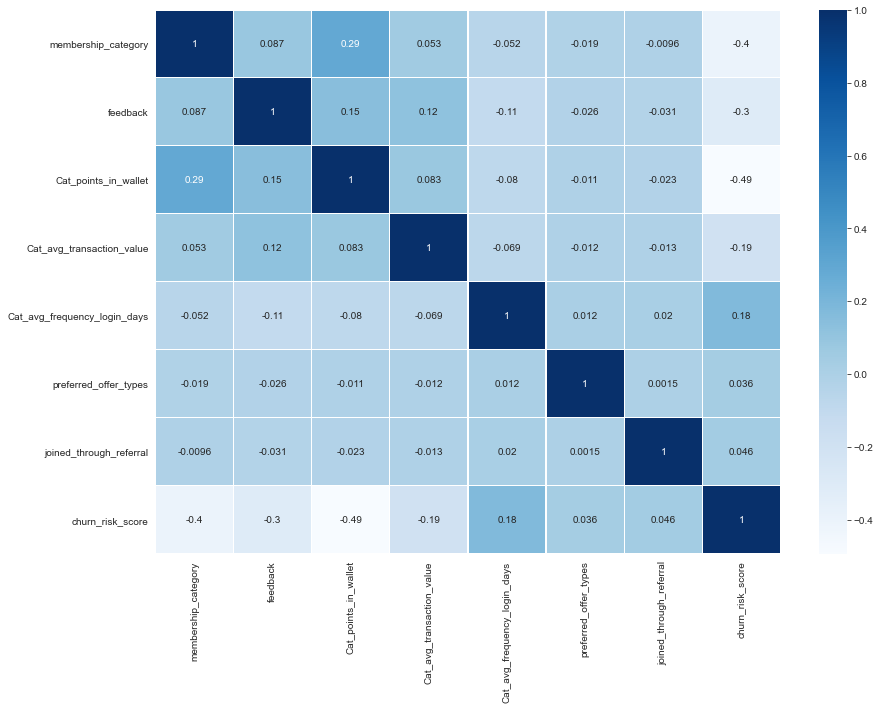

In [268]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(clean.corr(),cmap=colormap,annot=True,linewidths=0.2)

In [269]:
for i in df2.columns:
    df2[i]=df2[i].astype('category')

In [270]:
for i in df2.columns:
    df2[i]=df2[i].cat.codes

In [271]:
df2.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,past_complaint,complaint_status,feedback,churn_risk_score,Cat_age,Cat_days_since_last_login,Cat_avg_time_spent,Cat_avg_transaction_value,Cat_avg_frequency_login_days,Cat_points_in_wallet
0,8,0,2,3,0,1,2,2,10,11638,...,0,1,4,1,0,3,3,3,1,3
1,22,0,0,4,0,1,1,1,9,11819,...,1,2,5,0,1,3,3,1,1,0
2,34,0,1,2,1,1,1,2,7,13292,...,1,3,3,4,2,2,3,1,1,0
3,27,1,0,2,1,1,1,1,4,13291,...,1,4,3,4,1,1,3,1,0,0
4,21,0,0,2,0,0,2,1,10,3380,...,1,2,3,4,1,3,1,1,1,1


In [272]:
clean=df2.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'],axis=1)

In [294]:
clean.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Cat_age,Cat_days_since_last_login,Cat_avg_time_spent,Cat_avg_transaction_value,Cat_avg_frequency_login_days,Cat_points_in_wallet
0,0,2,3,0,1,2,2,1,1,0,1,4,1,0,3,3,3,1,3
1,0,0,4,0,1,1,1,1,0,1,2,5,0,1,3,3,1,1,0
2,0,1,2,1,1,1,2,0,1,1,3,3,4,2,2,3,1,1,0
3,1,0,2,1,1,1,1,0,1,1,4,3,4,1,1,3,1,0,0
4,0,0,2,0,0,2,1,0,1,1,2,3,4,1,3,1,1,1,1


In [281]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
predictors = clean.head(0)
selector = SelectKBest(score_func=chi2, k='all')
fit = selector.fit(X, y)
for i in range(len(fit.scores_)):
    print(clean.columns[i],":",fit.scores_[i])

gender : 1.3923661646841345
region_category : 26.672807992544737
membership_category : 13255.73500896855
joined_through_referral : 60.86267455473788
preferred_offer_types : 78.74347593860286
medium_of_operation : 24.617927909889232
internet_option : 3.353722529774526
used_special_discount : 2.2900497692183994
offer_application_preference : 39.51733742565454
past_complaint : 4.461097872321298
complaint_status : 2.4955158589493385
feedback : 12773.568438365184
churn_risk_score : 5.316266140532649
Cat_age : 39.3264876719123
Cat_days_since_last_login : 15.856528885372928
Cat_avg_time_spent : 1131.058835779001
Cat_avg_transaction_value : 707.7251496297179
Cat_avg_frequency_login_days : 15894.318026537796


C:\Users\FLEMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


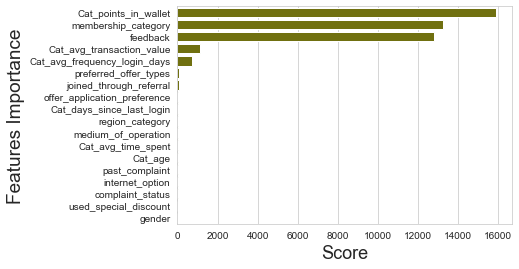

In [282]:
data=pd.DataFrame()
data['Feature']=X.columns[range(len(fit.scores_))]
data['Scores']=fit.scores_
data=data.sort_values(by='Scores',ascending=False)
sns.barplot(data['Scores'],data['Feature'],color='olive')
sns.set_style('whitegrid')
plt.ylabel('Features Importance',fontsize=19)
plt.xlabel('Score',fontsize=18)
plt.show()

In [295]:
clean=clean[['membership_category','feedback','Cat_points_in_wallet','Cat_avg_transaction_value','Cat_avg_frequency_login_days',
            'preferred_offer_types','joined_through_referral','churn_risk_score']]

# ML Models

In [296]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [322]:
X=clean.drop("churn_risk_score",axis=1)
y=clean["churn_risk_score"]

In [307]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [300]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [308]:
model=GradientBoostingClassifier(n_estimators=500)
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=500)

In [309]:
y_pred=model.predict (X_test)

In [310]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68      1174
           1       0.90      0.44      0.59       830
           2       0.86      0.91      0.88      3095
           3       0.71      0.51      0.59      2975
           4       0.69      0.92      0.79      3024

    accuracy                           0.75     11098
   macro avg       0.76      0.70      0.71     11098
weighted avg       0.75      0.75      0.74     11098



In [311]:
from sklearn.model_selection  import cross_val_score
scores= cross_val_score(model,X=X_train,y=y_train,cv=10,n_jobs=1)
print("Cross Validation accuracy scores: %s" % scores)
print("Cross Validation accuracy : %.3f +/- %.3f " %(np.mean(scores),np.std(scores)))#%.3- 3 decimal places

Cross Validation accuracy scores: [0.75096525 0.73513514 0.74671815 0.73938224 0.74159907 0.74816531
 0.73271533 0.73541908 0.72962534 0.72614909]
Cross Validation accuracy : 0.739 +/- 0.008 


In [291]:
from sklearn import metrics
score = 100 * metrics.f1_score(y_test, y_pred, average="macro")
score

69.45034551020447

In [319]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import svm
import random

In [323]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4])
n_classes = y.shape[1]

In [325]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=1))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [327]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: key of type tuple not found and not a MultiIndex

In [ ]:
X=clean.drop("churn_risk_score",axis=1)
y=clean["churn_risk_score"]

In [ ]:
df2.head()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
predictors = df2.head(0)
selector = SelectKBest(score_func=chi2, k='all')
fit = selector.fit(X, y)
for i in range(len(fit.scores_)):
    print(df2.columns[i],":",fit.scores_[i])

In [ ]:
data=pd.DataFrame()
data['Feature']=X.columns[range(len(fit.scores_))]
data['Scores']=fit.scores_
data=data.sort_values(by='Scores',ascending=False)
sns.barplot(data['Scores'],data['Feature'],color='olive')
sns.set_style('whitegrid')
plt.ylabel('Features Importance',fontsize=19)
plt.xlabel('Score',fontsize=18)
plt.show()